# WeatherPy
----

### Analysis
* Based off the four scatter plots, humidity is at its highest reaching the equator as expected.  There appears to be one city that has a humidity over 300%, which might be faulty and worth testing.  Meterologists use the term supersaturation to describe when humidity reaches past 100%, which is above where humidity tends to max out on the scatter plot.
* While there is no strong correlation between city latitude and wind speed, it does appear that your best bet to visiting  a city with high winds would be in the northern hemisphere.  Two cities were recorded with winds higher than 25 mph.
* There appears to be no correlation between city latitude and cloudiness as the cloudiness is spread across the graph.

---

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt
import json
import datetime
import time

In [2]:
# Identify API key and Base URL.
api_key = "584e767e11fbf599cad4502072efc33d"

## Generate Cities List

In [3]:
# Compile a list of random latitude and longitude coordinates.
lng = np.random.uniform (low=-1.5, high=2, size=2500) * 100
lats = np.random.uniform (low=-1.5, high=2, size=2500) * 100
map_site = np.stack((lats, lng), axis=-1)

In [4]:
# Create cities data frame
lat_lngs = []
for coordinate_pair in map_site:
    lats, lng = coordinate_pair
    lat_lngs.append(citipy.nearest_city(lats, lng))
    
iloop = set()
cities = []
for x in lat_lngs:
    if x not in iloop:
        cities.append(x)
        iloop.add(x)
    
print(len(cities))

555


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create Lists and Iterate.
ow_city = []
ow_cloud = []
ow_country = []
ow_date = []
ow_humid = []
ow_lat = []
ow_lon = []
ow_maxtmp = []
ow_wind = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
measure = "Imperial"

x = 1
    
# Loop through cities through openweathermap.
for city in cities:
    name = city.city_name
    print("Processing Record "+ str(x) + " Total " + str((len(cities))) + " | "  + name )
    url = base_url + "appid=" + api_key + "&q=" + name + "&units=" + measure
    print(url)
    open_weather = requests.get(url)
    requests_json = open_weather.json()
    
    try:
        ow_city.append(requests_json['name'])
        ow_cloud.append(requests_json['clouds']['all'])
        ow_country.append(requests_json['sys']['country'])
        ow_date.append(requests_json['dt'])
        ow_humid.append(requests_json['main']['humidity'])
        ow_lat.append(requests_json['coord']['lat'])
        ow_lon.append(requests_json['coord']['lon'])
        ow_maxtmp.append(requests_json['main']['temp_max'])
        ow_wind.append(requests_json['wind']['speed'])
        
        x = x + 1          
    except:
             print("City not found.  Skipping...")
    time.sleep(1)
    
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Processing Record 1 Total 555 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=saskylakh&units=Imperial
Processing Record 2 Total 555 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=tiksi&units=Imperial
Processing Record 3 Total 555 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=attawapiskat&units=Imperial
City not found.  Skipping...
Processing Record 3 Total 555 | camara de lobos
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=camara de lobos&units=Imperial
Processing Record 4 Total 555 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=bluff&units=Imperial
Processing Record 5 Total 555 | skovorodino
http://api.openweathermap.org/data/2.5/weather?appid=584e767e11fbf599cad4502072efc33d&q=skovorodino&units=Imperial
Processing Record 6 Total 555 | qaa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame based on your the retrieval data.
table_df = {"City": ow_city, "Cloudiness": ow_cloud, "Country": ow_country, "Date": ow_date, "Humidity": ow_humid,
            "Lat": ow_lat, "Lng": ow_lon, "Max Temp": ow_maxtmp, "Humidity": ow_humid, "Wind Speed": ow_wind}
weather_df = pd.DataFrame(table_df)
weather_df = weather_df.drop_duplicates(["City"], keep ='first')

weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,12,RU,1554701454,92,71.97,114.09,21.52,5.19
1,Tiksi,24,RU,1554701455,71,71.64,128.87,32.59,11.79
2,Camara de Lobos,20,PT,1554701068,71,32.63,-16.97,59.00,14.03
3,Bluff,0,AU,1554701459,35,-23.58,149.07,85.96,10.22
4,Skovorodino,32,RU,1554701460,35,53.99,123.94,38.44,6.64


In [16]:
# Count the number of items.
weather_df.count()

City          495
Cloudiness    495
Country       495
Date          495
Humidity      495
Lat           495
Lng           495
Max Temp      495
Wind Speed    495
dtype: int64

In [31]:
# Save to a csv file.
weather_df.to_csv("Weather_df.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

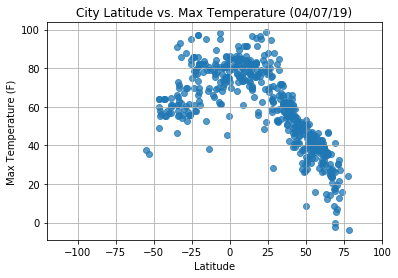

<Figure size 432x288 with 0 Axes>

In [44]:
# Build a scatter plot for temperature.
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha = 0.75)

# Label graph properties and save.
plt.title("City Latitude vs. Max Temperature (04/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-120,100)
plt.show()

plt.savefig("Temperature.png")

#### Latitude vs. Humidity Plot

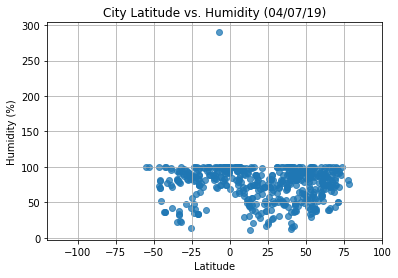

<Figure size 432x288 with 0 Axes>

In [45]:
# Build a scatter plot for humidity.
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha = 0.75)

# Label graph properties and save.
plt.title("City Latitude vs. Humidity (04/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-120,100)
plt.show()

plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

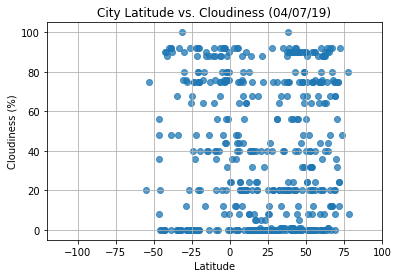

<Figure size 432x288 with 0 Axes>

In [46]:
# Build a scatter plot for cloudiness.
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha = 0.75)

# Label graph properties and save.
plt.title("City Latitude vs. Cloudiness (04/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-120,100)
plt.show()

plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

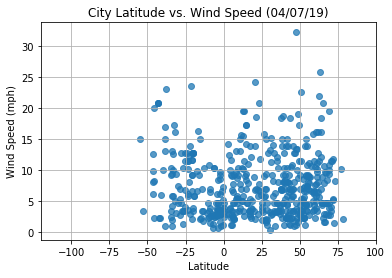

<Figure size 432x288 with 0 Axes>

In [47]:
# Build a scatter plot for wind speed.
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha = 0.75)

# Label graph properties and save.
plt.title("City Latitude vs. Wind Speed (04/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-120,100)
plt.show()

plt.savefig("WindSpeed.png")